In [1]:
import pandas as pd
from pathlib import Path

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
train_path = 'data/train/'
cropped_path = 'data/cropped_train/'
test_path = 'data/test/'
all_img_path = 'data/all_img'
CROPPED_PATH = Path(cropped_path)

#### Commence training: Stage-1 (resnet152)
- Setting up data bunch and transformations

In [4]:
tfms = get_transforms()
trn_df_labels = pd.read_csv('train_labels.csv',usecols=['filename','class_name'])

src = (ImageList.from_df(trn_df_labels,train_path, cols='filename')
       .split_by_rand_pct(0.2, seed=42).label_from_df('class_name'))

In [5]:
data224_32 = (src.transform(tfms,size=(224,299)).databunch(bs=24).normalize(imagenet_stats))

In [6]:
learn = cnn_learner(data224_32,models.resnet152,metrics=[error_rate,accuracy])

In [7]:
learn.lr_find()

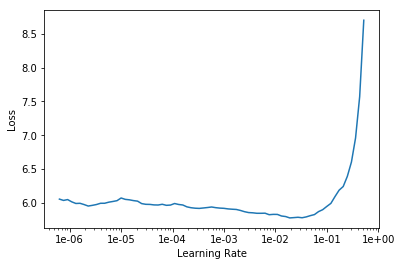

In [8]:
learn.recorder.plot()

In [10]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,precision,recall,time
0,4.672921,3.746114,0.813268,0.186732,nan,0.186732,03:37
1,2.862571,2.130151,0.496929,0.503071,nan,0.503071,03:30
2,1.742831,1.340450,0.326167,0.673833,0.722551,0.673833,03:29
3,1.204341,1.061345,0.259214,0.740786,0.765427,0.740786,03:29
4,0.914445,1.009286,0.243243,0.756757,0.784302,0.756757,03:30


In [11]:
learn.save('12-stage1')

In [12]:
learn.unfreeze()

In [13]:
learn.fit_one_cycle(10,slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,precision,recall,time
0,0.888151,0.964497,0.245700,0.754300,0.792935,0.754300,04:36
1,1.058518,1.010158,0.257985,0.742015,0.784950,0.742015,04:35
2,1.002259,1.074253,0.293612,0.706388,nan,0.706388,04:35
3,0.768968,0.844232,0.235872,0.764128,0.820728,0.764128,04:35
4,0.571937,0.789212,0.224816,0.775184,0.817478,0.775184,04:35
5,0.333338,0.586565,0.157862,0.842138,0.859165,0.842138,04:35
6,0.191304,0.554738,0.143735,0.856265,0.876120,0.856265,04:35
7,0.108730,0.497725,0.128378,0.871622,0.883004,0.871622,04:35
8,0.070027,0.464491,0.132064,0.867936,0.879540,0.867936,04:35
9,0.053923,0.463636,0.126536,0.873464,0.884461,0.873464,04:35


In [14]:
learn.save('12-stage2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


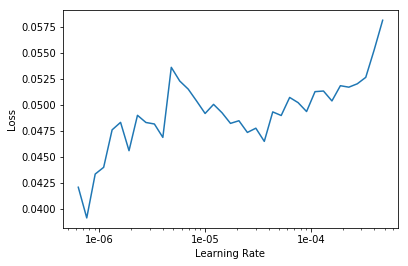

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(5, slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,precision,recall,time
0,0.048104,0.466288,0.124079,0.875921,0.886271,0.875921,04:35
1,0.049791,0.461074,0.122236,0.877764,0.888862,0.877764,04:36
2,0.037272,0.463788,0.124079,0.875921,0.887455,0.875921,04:35
3,0.029955,0.453031,0.116708,0.883292,0.892217,0.883292,04:35
4,0.033711,0.452339,0.120393,0.879607,0.890148,0.879607,04:35


In [17]:
learn.save('12-stage3')

In [34]:
learn.load('12-stage3');

In [8]:
data_ar = (src.transform(tfms,size=(299,400)).databunch(bs=12).normalize(imagenet_stats))

In [9]:
learn.data = data_ar

In [22]:
learn.freeze()

In [39]:
learn.lr_find(start_lr=1e-10)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


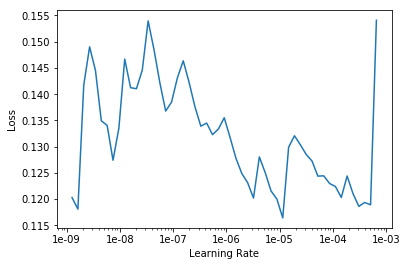

In [40]:
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(5,1e-6)

epoch,train_loss,valid_loss,error_rate,accuracy,precision,recall,time
0,0.086858,0.438017,0.114251,0.885749,0.896928,0.885749,08:30
1,0.094140,0.415321,0.109951,0.890049,0.901054,0.890049,08:30
2,0.086174,0.406428,0.106265,0.893735,0.904897,0.893735,08:31
3,0.081997,0.404973,0.110565,0.889435,0.901823,0.889435,08:29
4,0.085486,0.399086,0.105651,0.894349,0.905450,0.894349,08:29


In [42]:
learn.save('12-stage4.2')

In [20]:
learn.load('12-stage4.2');

In [22]:
learn.unfreeze()

In [23]:
learn.lr_find(start_lr=1e-8)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


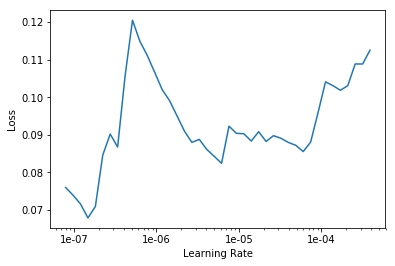

In [24]:
learn.recorder.plot()

In [25]:
learn.fit_one_cycle(10,slice(3e-7,3e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.068056,0.401427,0.108108,0.891892,08:30
1,0.066819,0.394532,0.102580,0.897420,08:29
2,0.064478,0.396947,0.109951,0.890049,08:28
3,0.056660,0.390975,0.101351,0.898649,08:29
4,0.042473,0.389081,0.100737,0.899263,08:29
5,0.053548,0.388539,0.104423,0.895577,08:29
6,0.050048,0.387687,0.105651,0.894349,08:30
7,0.049545,0.387605,0.098894,0.901106,08:28
8,0.038794,0.386403,0.098894,0.901106,08:29
9,0.050656,0.378948,0.097666,0.902334,08:29


In [26]:
learn.save('12-stage5.3')

### Test Set Performance

In [36]:
all_img_df = pd.read_csv('all_img.csv', usecols=['filename','class_name', 'test'])
data_test = (ImageList.from_df(all_img_df,all_img_path,cols='filename')
           .split_from_df(col='test').label_from_df(cols='class_name').transform(tfms,size=(299,400)).databunch(bs=64).normalize(imagenet_stats))

In [39]:
learn.load('12-stage5.3');

In [38]:
learn.data = data_test

In [40]:
learn.validate()

[0.3279637, tensor(0.0831), tensor(0.9169)]

Accuracy 91.69% 
Error rate 8.31% 